## Combining data sets
Often in data processing we are required to combine datasets together. Databases are usually designed to store data over many tables as opposed to one table, since it's more efficient. You may also be interested in combining data from different sources (eg. transport data from QLD government and weather data from BOM). 

***
## Concatenating data
If you want to combine two dataframes which have the same structure (ie. columns), you can use the <code>concat</code> method in pandas. The general structure is:

```python
pd.concat([dataframe_1, dataframe_2])
```

This will stack the first dataframe on top of the second, as shown in the figure below.

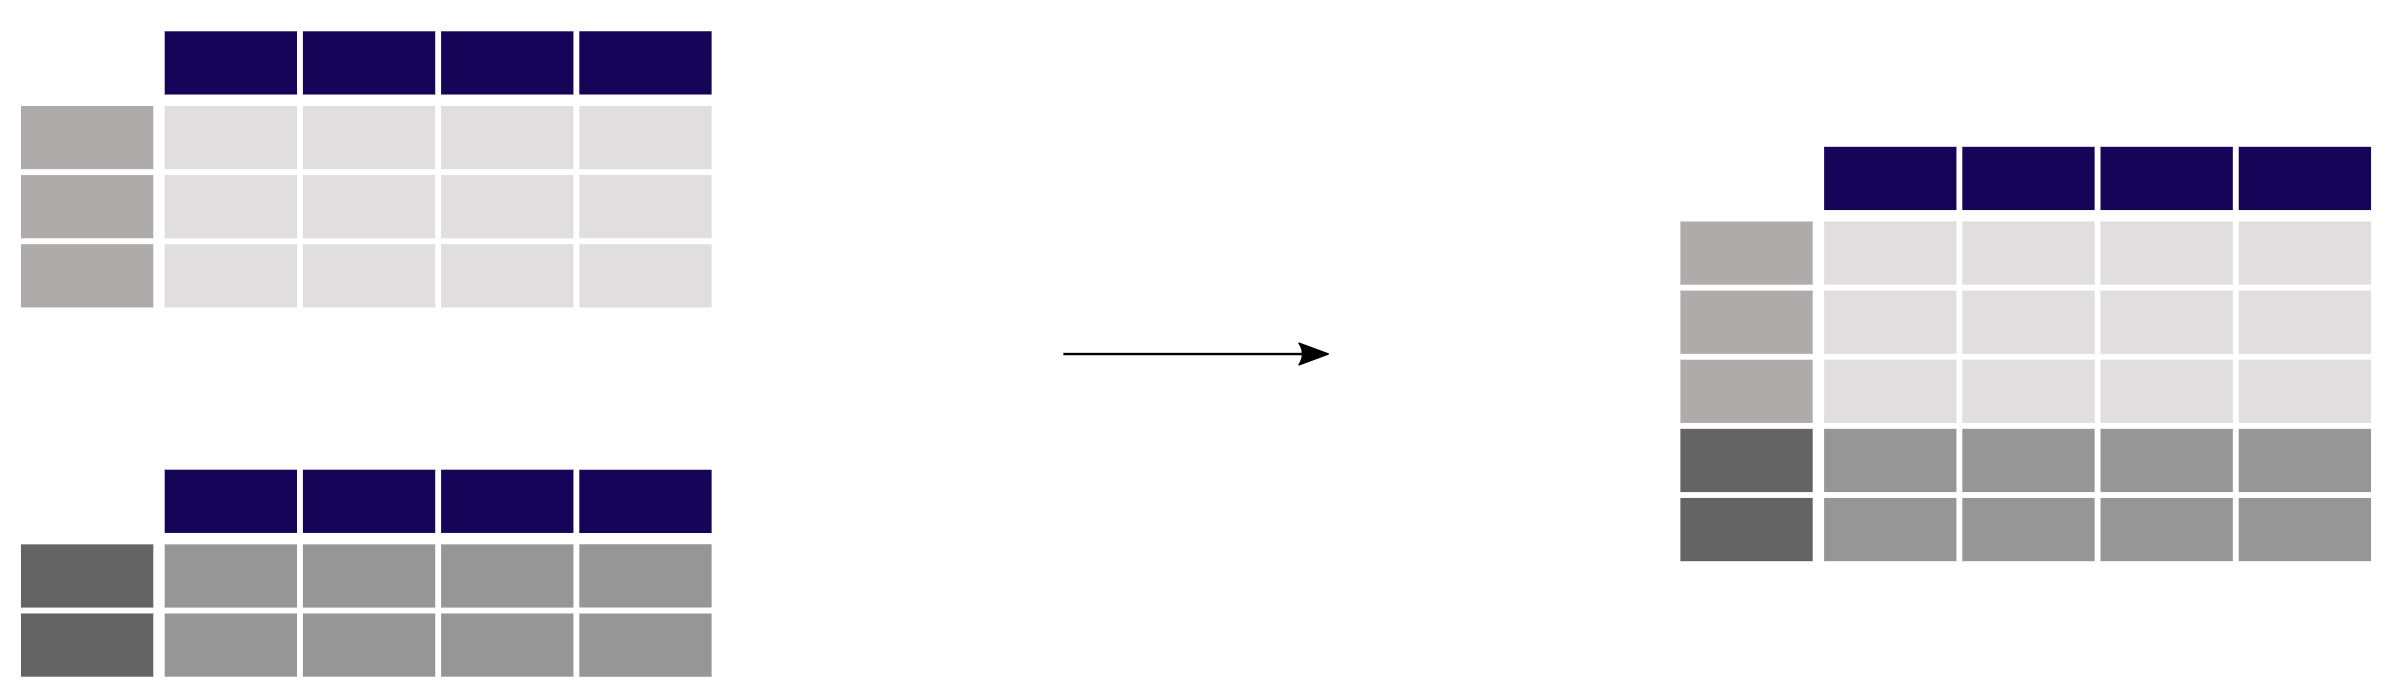

For example, suppose the domestic flights data was stored in a separate file for each year. The code below shows how you could get separate dataframes for 2000 and 2001.

In [1]:
# import data
import pandas as pd
flights = pd.read_csv('domestic_flights.csv')

# filter by year
def year_filter(row, dgt1, dgt2):
    return (dgt1 + dgt2) in row['Month']

flights_2000 = flights[flights.apply(year_filter, axis = 1, args = '00')]
flights_2001 = flights[flights.apply(year_filter, axis = 1, args = '01')]

We can combine these dataframes into one with the code below:

In [2]:
pd.concat([flights_2000, flights_2001])

,City1,City2,Month,Passenger_Trips,Aircraft_Trips,Route_Distance,Seats
8946,ADELAIDE,ALICE SPRINGS,Jan-00,12223,124,1316,16098
8947,ADELAIDE,BRISBANE,Jan-00,18598,163,1622,21521
8948,ADELAIDE,CANBERRA,Jan-00,2904,57,972,4673
8949,ADELAIDE,DARWIN,Jan-00,12253,131,2619,16358
8950,ADELAIDE,MELBOURNE,Jan-00,102673,1081,643,142638
...,...,...,...,...,...,...,...
10210,PERTH,SYDNEY,Dec-01,83449,463,3284,99190
10211,SUNSHINE COAST,MELBOURNE,Dec-01,1950,19,1454,2250
10212,SUNSHINE COAST,SYDNEY,Dec-01,12809,122,837,14200
10213,SYDNEY,TOWNSVILLE,Dec-01,5716,60,1690,6993


***
## Joining data
Dataframes can be joined in pandas using the merge method. The general syntax for the merge method is:

```python
left_df.merge(right_df, how = 'inner', on = None)
```

When calling the <code>merge</code> method, the dataframe you call the method on will appear on the left of the resulting dataframe. The only required input is the joining dataframe which will appear on the right. There are two default arguments that are important to change in order to join correctly.

The <code>on</code> argument is used to specify what variables should be used to combine the datasets together. The datasets should have one or more columns (or an index) of common information, which are referred to as the keys of the dataframe. These shared pieces of information are what allows us to correctly join information together. 

The <code>how</code> argument is used to specify what type of join to perform. There are four main types of joins:

* 'left': uses only keys from the left data frame.
* 'right': uses only keys from the right data frame.
* 'outer': uses keys that appear in either dataframe.
* 'inner': uses only keys that appear in both dataframes.

These joins are graphically represented below.

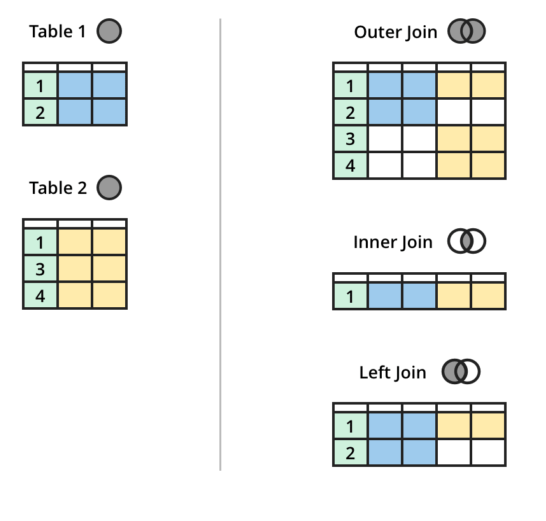

For example, suppose we wanted to compare annual passenger trips in Brisbane to the predicted passenger trips from brisbane_forecasts.csv. 

In [3]:
brisbane_forecasts = pd.read_csv('brisbane_forecasts.csv')
brisbane_forecasts

,Year,Predicted_Passenger_Trips
0,1991,5372000
1,1992,5477000
2,1993,5897000
3,1994,6671000
4,1995,7171000
5,1996,7430000
6,1997,7467000
7,1998,7544000
8,1999,8104000
9,2000,9928000


Firstly, we need to transform the data so there is a shared piece of information, which will be the year. This requires some wrangling of the domestic flights dataframe, which is given below:

In [4]:
# creating a year column using the last two characters in the month column
def year(month):
    abb_year = month[-2:]
    if int(abb_year) < 25:
        year = '20' + abb_year
    else:
        year = '19' + abb_year
    return int(year)

flights['Year'] = flights['Month'].apply(year)

# filtering for Brisbane and finding total passenger trips for each year
brisbane_flights = flights[(flights['City1'] == 'BRISBANE') | (flights['City2'] == 'BRISBANE')]
brisbane_totals = pd.DataFrame(brisbane_flights.groupby('Year')['Passenger_Trips'].sum())
brisbane_totals

,Passenger_Trips
Year,
1984,2364582
1985,2426784
1986,2607038
1987,2839255
1988,3449539
1989,2536580
1990,3380354
1991,4573937
1992,4731162


We now have a year column shared between the two dataframes that can be used to join them together.

In [5]:
brisbane_totals.merge(brisbane_forecasts, on = 'Year', how = 'outer')

,Year,Passenger_Trips,Predicted_Passenger_Trips
0,1984,2364582.0,NaN
1,1985,2426784.0,NaN
2,1986,2607038.0,NaN
3,1987,2839255.0,NaN
4,1988,3449539.0,NaN
5,1989,2536580.0,NaN
6,1990,3380354.0,NaN
7,1991,4573937.0,5372000.0
8,1992,4731162.0,5477000.0
9,1993,5383209.0,5897000.0


The example above is an outer join, which will keep the years present in either dataframe. Experiment with the other types of joins and see how they differ.